In [ ]:
# UPLOAD kaggle.json TO Colab ENVIRONMENT

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annamariiaandrushko","key":"5ae85b6215051055441f709d9e5d1b35"}'}

In [ ]:
# PLACE IT IN THE CORRECT LOCATION

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ONLY FOR THE FIRST-TIME COMPILATION

# DOWNLOAD A DATASET

!kaggle competitions download -c trackml-particle-identification -f train_sample.zip

 98% 847M/861M [00:05<00:00, 116MB/s] 
100% 861M/861M [00:05<00:00, 168MB/s]


In [ ]:
# ONLY FOR THE FIRST-TIME COMPILATION

# UNZIP

!unzip train_sample.zip -d trackml_data_sample

Archive:  train_sample.zip
   creating: trackml_data_sample/train_100_events/
  inflating: trackml_data_sample/train_100_events/event000001054-particles.csv  
  inflating: trackml_data_sample/train_100_events/event000001092-cells.csv  
  inflating: trackml_data_sample/train_100_events/event000001072-particles.csv  
  inflating: trackml_data_sample/train_100_events/event000001062-particles.csv  
  inflating: trackml_data_sample/train_100_events/event000001093-hits.csv  
  inflating: trackml_data_sample/train_100_events/event000001052-truth.csv  
  inflating: trackml_data_sample/train_100_events/event000001013-cells.csv  
  inflating: trackml_data_sample/train_100_events/event000001049-hits.csv  
  inflating: trackml_data_sample/train_100_events/event000001038-cells.csv  
  inflating: trackml_data_sample/train_100_events/event000001002-cells.csv  
  inflating: trackml_data_sample/train_100_events/event000001056-truth.csv  
  inflating: trackml_data_sample/train_100_events/event000001082-

In [ ]:
# CREATE A LOCAL PATH TO THE DATASET IN YOUR Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ONLY FOR THE FIRST-TIME COMPILATION

# MOUNT DATA IN YOUR Google Drive

!mv trackml_data_sample /content/drive/MyDrive/

mv: cannot stat 'trackml_data_sample': No such file or directory


In [ ]:
# LIST OF IMPORTS

import numpy as np
import pandas as pd
from pandas.errors import EmptyDataError
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from scipy.spatial import KDTree
import glob

In [ ]:
# CHECK IF THE DATA IS ACCESSIBLE

dataset_path = "/content/drive/MyDrive/trackml_data_sample/train_100_events"
print(os.listdir(dataset_path))

['event000001018-hits.csv', 'event000001015-particles.csv', 'event000001008-truth.csv', 'event000001001-cells.csv', 'event000001000-hits.csv', 'event000001011-particles.csv', 'event000001002-hits.csv', 'event000001016-hits.csv', 'event000001000-particles.csv', 'event000001007-cells.csv', 'event000001010-cells.csv', 'event000001000-cells.csv', 'event000001001-truth.csv', 'event000001013-cells.csv', 'event000001009-truth.csv', 'event000001007-truth.csv', 'event000001004-cells.csv', 'event000001009-particles.csv', 'event000001007-particles.csv', 'event000001004-hits.csv', 'event000001013-particles.csv', 'event000001013-hits.csv', 'event000001017-truth.csv', 'event000001019-hits.csv', 'event000001002-truth.csv', 'event000001001-particles.csv', 'event000001008-hits.csv', 'event000001006-truth.csv', 'event000001014-truth.csv', 'event000001006-hits.csv', 'event000001006-cells.csv', 'event000001011-hits.csv', 'event000001014-cells.csv', 'event000001017-hits.csv', 'event000001002-particles.csv'

In [ ]:
# DELETE MOUNTED DATA FROM YOUR DRIVE (FOR FUTURE PURPOSES)

import shutil
shutil.rmtree('/content/drive/MyDrive/trackml_data', ignore_errors = True)

In [ ]:
# INSTALL trackml UTILITIES

!pip install git+https://github.com/LAL/trackml-library.git

  Cloning https://github.com/LAL/trackml-library.git to /tmp/pip-req-build-8v04djwe
  Running command git clone --filter=blob:none --quiet https://github.com/LAL/trackml-library.git /tmp/pip-req-build-8v04djwe
  Resolved https://github.com/LAL/trackml-library.git to commit 53a165e15a2c885f54c2bef1bd1ed53db6ed9648
  Preparing metadata (setup.py) ... done
  Created wheel for trackml: filename=trackml-3-py2.py3-none-any.whl size=13503 sha256=54c14b6acfe6a48cf10d93eeffeebb45665d8a20b1edcfab9688afa2da522d38
  Stored in directory: /tmp/pip-ephem-wheel-cache-h6j3yo1w/wheels/6f/ca/69/7d1d1b8729b778df00e4bc98f8a2a555d53dd47eb5535b0301
Successfully built trackml


In [ ]:
# trackml IMPORTS

from trackml.dataset import load_event, load_dataset
from trackml.randomize import shuffle_hits
from trackml.score import score_event

In [ ]:
# ACCESS ONE EVENT

dataset_path = "/content/drive/MyDrive/trackml_data_sample/train_100_events/event000001010"
hits, cells, particles, truth = load_event(dataset_path)

In [ ]:
# INSIGHT INTO DATA STRUCTURE

hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-95.104897,-11.22140,-1502.5,7,2,1
1,2,-54.898102,-9.61188,-1502.5,7,2,1
2,3,-58.008400,3.08322,-1502.5,7,2,1
3,4,-97.298401,-8.18418,-1502.5,7,2,1
4,5,-64.370499,-11.56120,-1502.5,7,2,1




---


**PROCESS THE WHOLE EVENT**

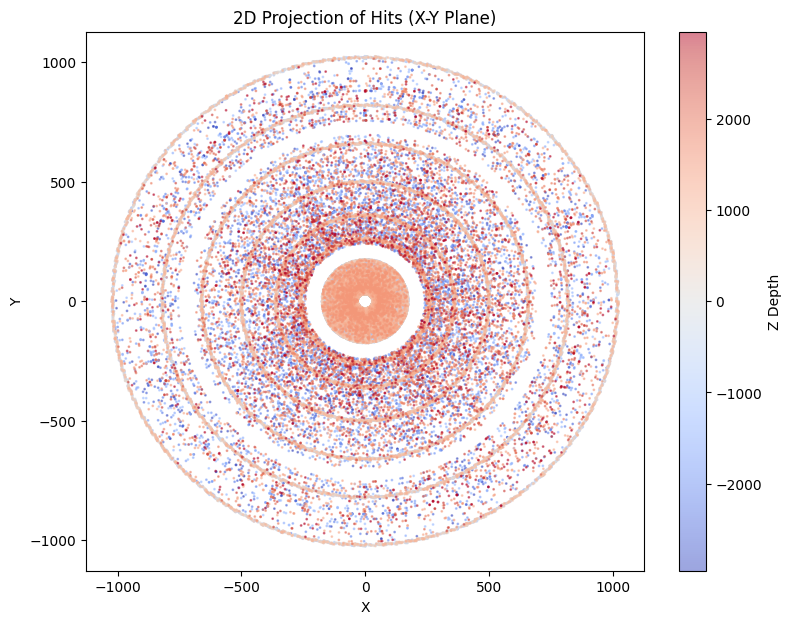

In [ ]:
# 2D PROJECTION OF ONE EVENT

x = hits["x"]
y = hits["y"]
z = hits["z"]

plt.figure(figsize = (9, 7))
plt.scatter(x, y, s = 1, c = z, cmap = 'coolwarm', alpha = 0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Projection of Hits (X-Y Plane)")
plt.colorbar(label = "Z Depth")
plt.show()

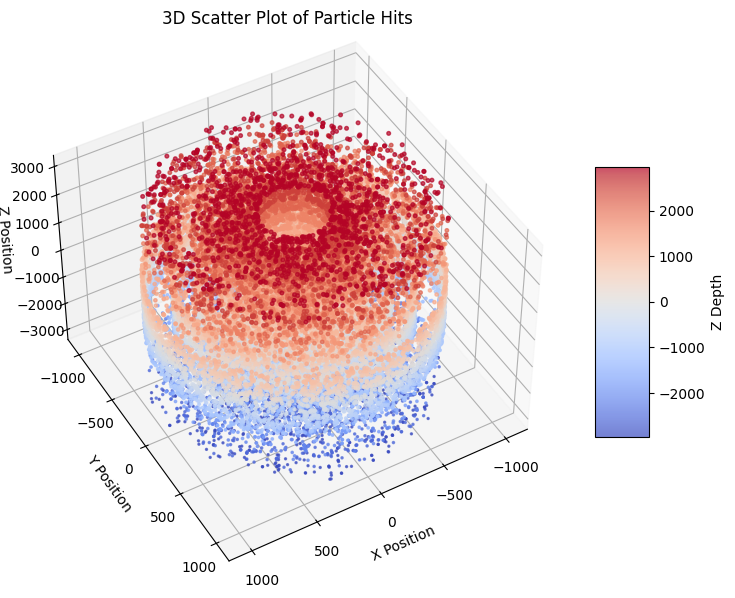

In [ ]:
# 3D PROJECTION OF ONE EVENT

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')

cmap = 'coolwarm'

sc = ax.scatter(x, y, z, c = z, cmap = cmap, s = 2 + (z - z.min()) / (z.max() - z.min()) * 5, alpha = 0.7)

ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Z Position")
ax.set_title("3D Scatter Plot of Particle Hits")

ax.view_init(elev = 45, azim = 60)

cbar = plt.colorbar(sc, ax = ax, shrink = 0.5, aspect = 5)
cbar.set_label("Z Depth")

plt.show()

In [ ]:
# RECONSTRUCTION ALGORITHM

# CALCULATE RADIUS IN X-Y PLANE
r = np.sqrt(x**2 + y**2)

# SORT HITS BY DECREASING RADIUS (MOVE FROM THE EDGE TOWARDS THE CENTRE)
sort_idx = np.argsort(-r)
x, y, z = x[sort_idx], y[sort_idx], z[sort_idx]

# RECOMPUTE RADIUS AFTER SORTING
r = np.sqrt(x**2 + y**2)

# BUILD KDTree
hits_array = np.vstack((x, y, z)).T
kdtree = KDTree(hits_array)

visited = set()
tracks = []

# LOOP OVER EACH SET OF xyz
for i in range(len(hits_array)):
    if i in visited:
        continue

    track = [hits_array[i]]
    visited.add(i)

    current_hit = hits_array[i]
    r_current = np.sqrt(current_hit[0]**2 + current_hit[1]**2)
    previous_direction = None

    while True:
        distances, indices = kdtree.query(current_hit, k = 80) # k -- NUMBER OF NEAREST NEIGHBOURS
        found_next = False

        for j in indices[1:]: # SKIP SELF
            if j in visited:
                continue

            candidate_hit = hits_array[j]
            r_candidate = np.sqrt(candidate_hit[0]**2 + candidate_hit[1]**2)

            # 1. ONLY ACCEPT THE CANDIDATE IF IT IS MOVING INWARDS
            if r_candidate > r_current:
                continue

            # 2. AVOID BIG BACKWARD JUMPS IN z
            if np.abs(candidate_hit[2]) < np.abs(current_hit[2]):
                continue

            # 3. DIRECTION SMOOTHNESS
            if previous_direction is not None:
                new_direction = candidate_hit - current_hit
                cosine_angle = np.dot(new_direction, previous_direction) / (
                    np.linalg.norm(new_direction) * np.linalg.norm(previous_direction)
                )
                if cosine_angle < 0.8: # SMALL ANGLE DEVIATION
                    continue

            # ACCEPT THIS HIT
            track.append(candidate_hit)
            visited.add(j)
            previous_direction = candidate_hit - current_hit
            current_hit = candidate_hit
            r_current = r_candidate
            found_next = True
            break

        if not found_next:
            break

    if len(track) > 3: # MINIMUM NUMBER OF POINTS IN A TRAJECTORY
        tracks.append(np.array(track))

<ipython-input-12-8260d2c3995f>:58: RuntimeWarning: invalid value encountered in scalar divide
  cosine_angle = np.dot(new_direction, previous_direction) / (


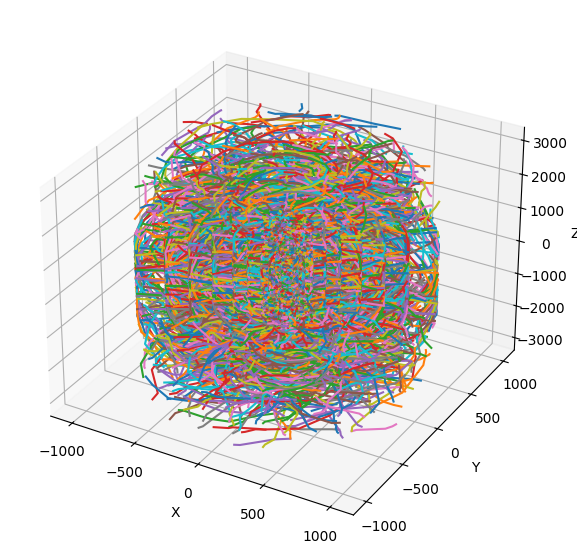

In [ ]:
# PLOT TRAJECTORIES

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')

for track in tracks:
    ax.plot(track[:, 0], track[:, 1], track[:, 2])

ax.scatter(x, y, z, s = 0, c = 'r', marker = 'o', alpha = 0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



---

PROCESS A FRACTION OF THE EVENT


In [ ]:
# SELECT HITS ONLY FROM VOLUMES 8 (INNER TRACKER BARREL) AND 13 (OUTER TRACKER BARREL)

hits = hits[
    ((hits['volume_id'] == 8) & (hits['layer_id'].isin([1, 2, 3]))) |
    ((hits['volume_id'] == 13) & (hits['layer_id'].isin(range(1, 9))))
]

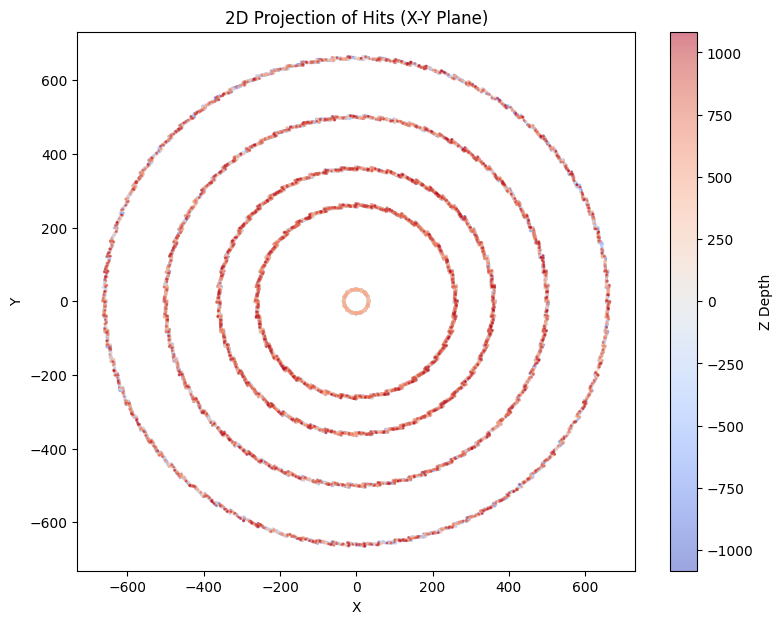

In [ ]:
# 2D PROJECTION

x = hits["x"]
y = hits["y"]
z = hits["z"]

plt.figure(figsize = (9, 7))
plt.scatter(x, y, s = 1, c = z, cmap = 'coolwarm', alpha = 0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Projection of Hits (X-Y Plane)")
plt.colorbar(label = "Z Depth")
plt.show()

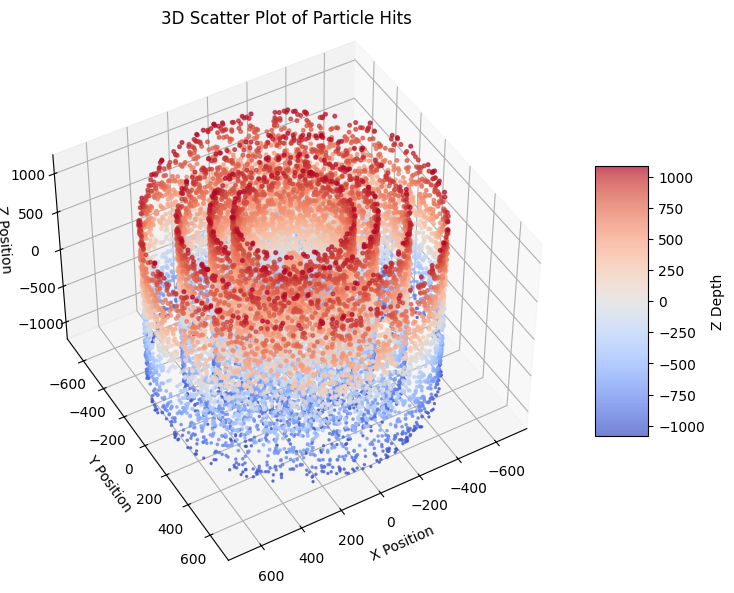

In [ ]:
# 3D PROJECTION

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')

cmap = 'coolwarm'

sc = ax.scatter(x, y, z, c = z, cmap = cmap, s = 2 + (z - z.min()) / (z.max() - z.min()) * 5, alpha = 0.7)

ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Z Position")
ax.set_title("3D Scatter Plot of Particle Hits")

ax.view_init(elev = 45, azim = 60)

cbar = plt.colorbar(sc, ax = ax, shrink = 0.5, aspect = 5)
cbar.set_label("Z Depth")

plt.show()

In [ ]:
# ACCESS ONE EVENT

dataset_path = "/content/drive/MyDrive/trackml_data_sample/train_100_events/event000001020"
hits, cells, particles, truth = load_event(dataset_path)

In [ ]:
# LOAD ENERGY PER HIT FROM 'cells.csv'
energy_per_hit = cells.groupby("hit_id")["value"].sum()

# MERGE WITH HITS
hits = hits.merge(energy_per_hit, on = "hit_id", how = "left")
hits.rename(columns = {"value": "energy_loss"}, inplace = True)
hits["energy_loss"].fillna(0, inplace = True)

<ipython-input-28-11b65fd99a66>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace = True)


In [ ]:
# FUNCTION TO FIT THE CIRCLE TO THE TRAJECTORY IN XY-PLANE (FOR MOMENTUM CALCULATION)

def fit_circle_2d(x, y):
    A = np.c_[2*x, 2*y, np.ones(len(x))]
    b = x**2 + y**2
    c, _, _, _ = np.linalg.lstsq(A, b, rcond = None)
    x0, y0, r_squared = c[0], c[1], c[2]
    radius = np.sqrt(r_squared + x0**2 + y0**2)
    return radius

In [ ]:
# RECONSTRUCTION ALGORITHM

# DEFINE GLOBAL LAYER ORDER
layer_order = [
    "8_1", "8_2", "8_3",
    "13_1", "13_2", "13_3", "13_4", "13_5", "13_6", "13_7", "13_8"
]

layer_rank = {layer: i for i, layer in enumerate(layer_order)}

# CONSTRUCT GLOBAL LAYER ID AND FILTER HITS ACCORDINGLY (SO THAT HITS ARE LINKED LAYER BY LAYER, NOT WITHIN ONE LAYER)
hits["global_layer"] = hits["volume_id"].astype(str) + "_" + hits["layer_id"].astype(str)
hits = hits[hits["global_layer"].isin(layer_rank)]  # REMOVE UNRELATED VOLUMES/LAYERS
hits["global_rank"] = hits["global_layer"].map(layer_rank)

# EXTRACT AND SORT BY DESCENDING RADIUS
x = hits["x"].values
y = hits["y"].values
z = hits["z"].values
global_ranks = hits["global_rank"].values
energy_loss = hits["energy_loss"].values

r = np.sqrt(x**2 + y**2)
sort_idx = np.argsort(-r)

x, y, z = x[sort_idx], y[sort_idx], z[sort_idx]
global_ranks = global_ranks[sort_idx]
energy_loss = energy_loss[sort_idx]

# KDTree
hits_array = np.vstack((x, y, z)).T
kdtree = KDTree(hits_array)

visited = set()
tracks = []

# LOOP OVER EACH SET OF xyz
for i in range(len(hits_array)):
    if i in visited:
        continue

    track = [hits_array[i]]
    visited.add(i)
    current_hit = hits_array[i]
    current_rank = global_ranks[i]
    previous_direction = None

    while True:
        distances, indices = kdtree.query(current_hit, k = 80) # k -- NUMBER OF NEAREST NEIGHBOURS
        found_next = False

        for j in indices[1:]: # SKIP SELF
            if j in visited:
                continue

            candidate_hit = hits_array[j]
            candidate_rank = global_ranks[j]

            # 1. ONLY ACCEPT THE CANDIDATE IF IT IS MOVING INWARDS
            if candidate_rank >= current_rank:
                continue

            # 2. AVOID BACKWARD JUMPS IN z
            if candidate_hit[2] < current_hit[2]:
                continue

            # 3. DIRECTION SMOOTHNESS
            if previous_direction is not None:
                new_direction = candidate_hit - current_hit
                cosine_angle = np.dot(new_direction, previous_direction) / (
                    np.linalg.norm(new_direction) * np.linalg.norm(previous_direction)
                )
                if cosine_angle < 0.65:
                    continue

            # ACCEPT THIS HIT
            track.append(candidate_hit)
            visited.add(j)
            previous_direction = candidate_hit - current_hit
            current_hit = candidate_hit
            current_rank = candidate_rank
            found_next = True
            break

        if not found_next:
            break

    if len(track) > 3: # MINIMUM NUMBER OF POINTS IN A TRAJECTORY
      track_array = np.array(track)
      length = np.sum(np.linalg.norm(np.diff(track_array, axis=0), axis=1)) # CALCULATE TRACK LENGTH

      # GET INDICES OF HITS USED AND CALCULATE TOTAL ENERGY LOSS
      track_indices = [np.where((hits_array == hit).all(axis=1))[0][0] for hit in track_array]
      total_energy_loss = np.sum(energy_loss[track_indices])

      # CALCULATE dE/dx
      dedx = total_energy_loss / length if length > 0 else 0

      # CALCULATE p
      x_track = track_array[:, 0]
      y_track = track_array[:, 1]

      if len(x_track) >= 3:
        radius_xy_mm = fit_circle_2d(x_track, y_track)  # mm
        radius_xy_m = radius_xy_mm / 1000.0

        # ESTIMATE PITCH
        phi = np.arctan2(y_track, x_track)
        delta_phi = phi[-1] - phi[0]
        delta_z = z[-1] - z[0]

        # PREVENT DIVISION BY 0 OR MEANINGLESS PITCH
        if np.abs(delta_phi) > 1e-2:
            pitch = delta_z / delta_phi
            radius_3D = np.sqrt(radius_xy_m**2 + (pitch / (2 * np.pi))**2)
            p = 0.3 * 2.0 * radius_3D  # MeV/c
        else:
            p = 0
      else:
          p = 0

      tracks.append({
          "hits": track_array,
          "length": length,
          "energy_loss": total_energy_loss,
          "dedx": dedx,
          "p": p
      })

<ipython-input-29-a6d24de678fc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hits["global_rank"] = hits["global_layer"].map(layer_rank)


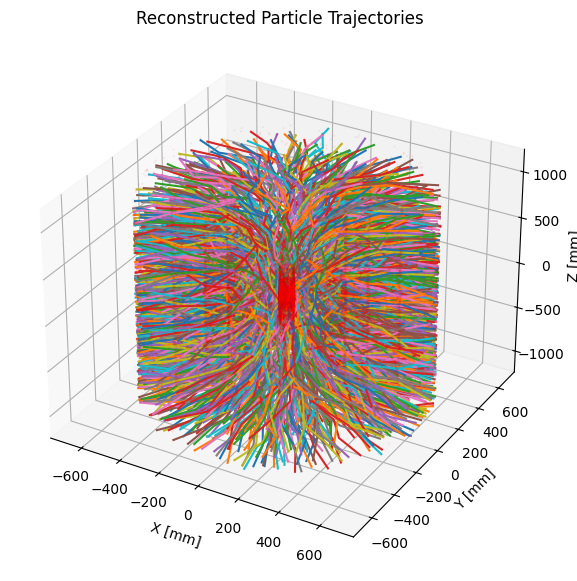

In [ ]:
# PLOT TRAJECTORIES

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')

for track in tracks:
    hits = track["hits"]
    ax.plot(hits[:, 0], hits[:, 1], hits[:, 2])


ax.scatter(x, y, z, s = 0.5, c = 'r', marker = 'o', alpha = 0.05)

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
plt.title("Reconstructed Particle Trajectories")
plt.show()

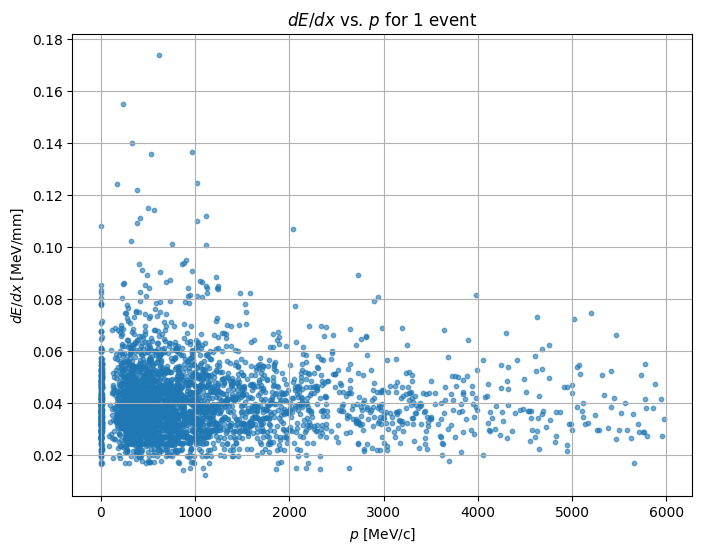

In [ ]:
# PLOT dEdx/(p)

dedx_vals = [track["dedx"] for track in tracks]
p_vals = [track["p"] for track in tracks]

plt.figure(figsize=(8, 6))
plt.scatter(p_vals, dedx_vals, alpha=0.6, s=10)
plt.xlabel(r"$p$ [MeV/c]")
plt.ylabel(r"$dE/dx$ [MeV/mm]")
plt.title(r"$dE/dx$ vs. $p$ for 1 event")
plt.grid(True)
plt.show()

---

PROCESS 100 EVENTS



In [ ]:
all_dedx = []
all_p = []

In [ ]:
# RECONSTRUCTION ALGORITHM

def reconstruct_tracks(hits):
  # DEFINE GLOBAL LAYER ORDER
  layer_order = [
      "8_1", "8_2", "8_3",
      "13_1", "13_2", "13_3", "13_4", "13_5", "13_6", "13_7", "13_8"
  ]

  layer_rank = {layer: i for i, layer in enumerate(layer_order)}

  # CONSTRUCT GLOBAL LAYER ID AND FILTER HITS ACCORDINGLY (SO THAT HITS ARE LINKED LAYER BY LAYER, NOT WITHIN ONE LAYER)
  hits["global_layer"] = hits["volume_id"].astype(str) + "_" + hits["layer_id"].astype(str)
  hits = hits[hits["global_layer"].isin(layer_rank)]  # REMOVE UNRELATED VOLUMES/LAYERS
  hits["global_rank"] = hits["global_layer"].map(layer_rank)

  # EXTRACT AND SORT BY DESCENDING RADIUS
  x = hits["x"].values
  y = hits["y"].values
  z = hits["z"].values
  global_ranks = hits["global_rank"].values
  energy_loss = hits["energy_loss"].values

  r = np.sqrt(x**2 + y**2)
  sort_idx = np.argsort(-r)

  x, y, z = x[sort_idx], y[sort_idx], z[sort_idx]
  global_ranks = global_ranks[sort_idx]
  energy_loss = energy_loss[sort_idx]

  # KDTree
  hits_array = np.vstack((x, y, z)).T
  kdtree = KDTree(hits_array)

  visited = set()
  tracks = []

  # LOOP OVER EACH SET OF xyz
  for i in range(len(hits_array)):
      if i in visited:
          continue

      track = [hits_array[i]]
      visited.add(i)
      current_hit = hits_array[i]
      current_rank = global_ranks[i]
      previous_direction = None

      while True:
          distances, indices = kdtree.query(current_hit, k = 85) # k -- NUMBER OF NEAREST NEIGHBOURS
          found_next = False

          for j in indices[1:]: # SKIP SELF
              if j in visited:
                  continue

              candidate_hit = hits_array[j]
              candidate_rank = global_ranks[j]

              # 1. ONLY ACCEPT THE CANDIDATE IF IT IS MOVING INWARDS
              if candidate_rank >= current_rank:
                  continue

              # 2. AVOID BIG BACKWARD JUMPS IN z
              if candidate_hit[2] < current_hit[2]:
                  continue

              # 3. DIRECTION SMOOTHNESS
              if previous_direction is not None:
                  new_direction = candidate_hit - current_hit
                  cosine_angle = np.dot(new_direction, previous_direction) / (
                      np.linalg.norm(new_direction) * np.linalg.norm(previous_direction)
                  )
                  if cosine_angle < 0.8:
                      continue

              # ACCEPT THIS HIT
              track.append(candidate_hit)
              visited.add(j)
              previous_direction = candidate_hit - current_hit
              current_hit = candidate_hit
              current_rank = candidate_rank
              found_next = True
              break

          if not found_next:
              break

      if len(track) > 3: # MINIMUM NUMBER OF POINTS IN A TRAJECTORY
        track_array = np.array(track)
        length = np.sum(np.linalg.norm(np.diff(track_array, axis=0), axis=1)) # CALCULATE TRACK LENGTH

        # GET INDICES OF HITS USED AND CALCULATE TOTAL ENERGY LOSS
        track_indices = [np.where((hits_array == hit).all(axis=1))[0][0] for hit in track_array]
        total_energy_loss = np.sum(energy_loss[track_indices])

        # CALCULATE dE/dx
        dedx = total_energy_loss / length if length > 0 else 0

        # CALCULATE pT
        x_track = track_array[:, 0]
        y_track = track_array[:, 1]

        if len(x_track) >= 3:
          radius_xy_mm = fit_circle_2d(x_track, y_track)  # mm
          radius_xy_m = radius_xy_mm / 1000.0

          # ESTIMATE PITCH
          phi = np.arctan2(y_track, x_track)
          delta_phi = phi[-1] - phi[0]
          delta_z = z[-1] - z[0]

          # PREVENT DIVISION BY 0 OR MEANINGLESS PITCH
          if np.abs(delta_phi) > 1e-2:
              pitch = delta_z / delta_phi
              radius_3D = np.sqrt(radius_xy_m**2 + (pitch / (2 * np.pi))**2)
              p = 0.3 * 2.0 * radius_3D  # MeV/c
          else:
              p = 0
        else:
            p = 0

        all_dedx.append(dedx)
        all_p.append(p)

        tracks.append({
            "hits": track_array,
            "length": length,
            "energy_loss": total_energy_loss,
            "dedx": dedx,
            "p": p
        })

In [ ]:
# PROCESS 100 EVENTS

# SET THE DATASET PATH
base_path = "/content/drive/MyDrive/trackml_data_sample/train_100_events"

# SORT EVENT FILES
hits_files = sorted(glob.glob(os.path.join(base_path, "event*-hits.csv")))
event_paths = sorted(list(set(f.rsplit('-', 1)[0] for f in hits_files)))
event_paths = event_paths[:100]

# LOOP THROUGH EVENTS
for dataset_path in event_paths:
    print(f"Processing: {dataset_path}")

    try:
        # LOAD EVENT
        hits, cells, particles, truth = load_event(dataset_path)

        # SELECT HITS ONLY FROM VOLUMES 8 AND 13
        hits = hits[
            ((hits['volume_id'] == 8) & (hits['layer_id'].isin([1, 2, 3]))) |
            ((hits['volume_id'] == 13) & (hits['layer_id'].isin(range(1, 9))))
        ]

        # LOAD ENERGY PER HIT FROM 'cells.csv' AND MERGE WITH HITS
        energy_per_hit = cells.groupby("hit_id")["value"].sum()
        hits = hits.merge(energy_per_hit, on="hit_id", how="left")
        hits.rename(columns={"value": "energy_loss"}, inplace=True)
        hits["energy_loss"].fillna(0, inplace=True)

        # TRACK RECONSTRUCTION FUNCTION
        reconstruct_tracks(hits)

    # EMPTY AND CORRUPTED FILES HANDLING
    except EmptyDataError:
        print(f"Skipped (empty file): {dataset_path}")
    except Exception as e:
        print(f"Skipped (error): {dataset_path} | Reason: {e}")

Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001000


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001001


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001002


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001003


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001004


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001005


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001006


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001007


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001008


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001009


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001010


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001011


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001012


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001013


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001014


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001015


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001016


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001017


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001018
Skipped (empty file): /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001018
Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001019


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001020


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001021
Skipped (error): /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001021 | Reason: No file matches '/content/drive/MyDrive/trackml_data_sample/train_100_events/event000001021-truth.csv*'
Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001022


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001023


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001024


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001025


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001026


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001027


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001028


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001029


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001030


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001031


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001032


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001033


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001034


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001035


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001036
Skipped (error): /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001036 | Reason: No file matches '/content/drive/MyDrive/trackml_data_sample/train_100_events/event000001036-cells.csv*'
Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001037


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001038


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001039
Skipped (error): /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001039 | Reason: No file matches '/content/drive/MyDrive/trackml_data_sample/train_100_events/event000001039-truth.csv*'
Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001040


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001041


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001042


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001043


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001044


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001045


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001046


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001047


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001048


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001049


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001050


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001051


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001052


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001053


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001054


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001055


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001056


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001057


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001058
Skipped (error): /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001058 | Reason: No file matches '/content/drive/MyDrive/trackml_data_sample/train_100_events/event000001058-cells.csv*'
Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001059


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001060


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001061


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001062


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001063


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001064


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001065


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001066


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001067


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001068


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001069


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001070


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001071


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001072


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001073


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001074


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001075


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001076


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001077


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001078


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001079


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001080


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001081


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001082


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001083


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001084


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001085


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001086


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001087


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001088


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001089


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001090


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001091


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001092


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001093


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001094
Skipped (error): /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001094 | Reason: No file matches '/content/drive/MyDrive/trackml_data_sample/train_100_events/event000001094-cells.csv*'
Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001095


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001096


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001097


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001098


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


Processing: /content/drive/MyDrive/trackml_data_sample/train_100_events/event000001099


<ipython-input-44-9305c91ee6ec>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hits["energy_loss"].fillna(0, inplace=True)


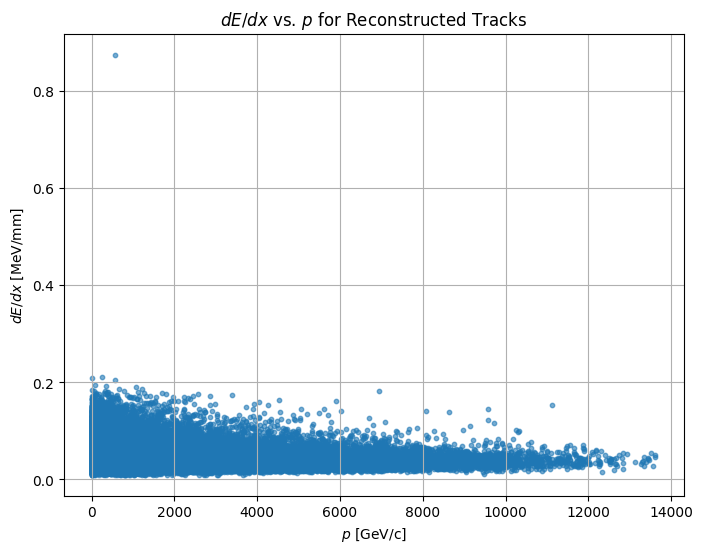

In [ ]:
# PLOT dE/dx(p)

plt.figure(figsize=(8, 6))
plt.scatter(all_p, all_dedx, alpha=0.6, s=10)
plt.xlabel(r"$p$ [GeV/c]")
plt.ylabel(r"$dE/dx$ [MeV/mm]")
plt.title(r"$dE/dx$ vs. $p$ for Reconstructed Tracks")
plt.grid(True)
plt.show()

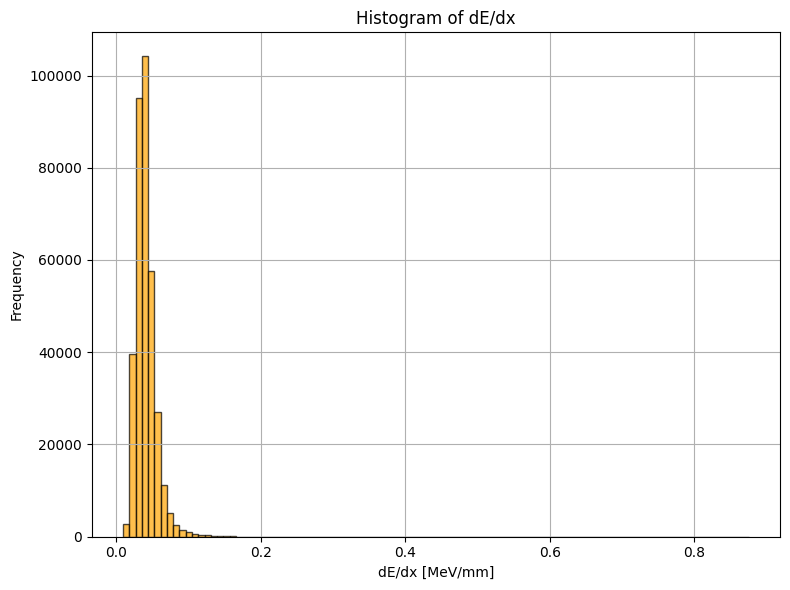

In [ ]:
# dE/dx HISTOGRAM

plt.figure(figsize=(8, 6))
plt.hist(all_dedx, bins=100, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("dE/dx [MeV/mm]")
#plt.yscale("log")
plt.ylabel("Frequency")
plt.title("Histogram of dE/dx")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# p BINNING

p_bins = [0, 2000, 4000, 6000, 8000, 10000, 12000]
bin_labels = [f"{p_bins[i]}–{p_bins[i+1]} GeV/c" for i in range(len(p_bins)-1)]

dedx_binned = [[] for _ in range(len(p_bins)-1)]

for dedx, p in zip(all_dedx, all_p):
    for i in range(len(p_bins)-1):
        if p_bins[i] <= p < p_bins[i+1]:
            dedx_binned[i].append(dedx)
            break

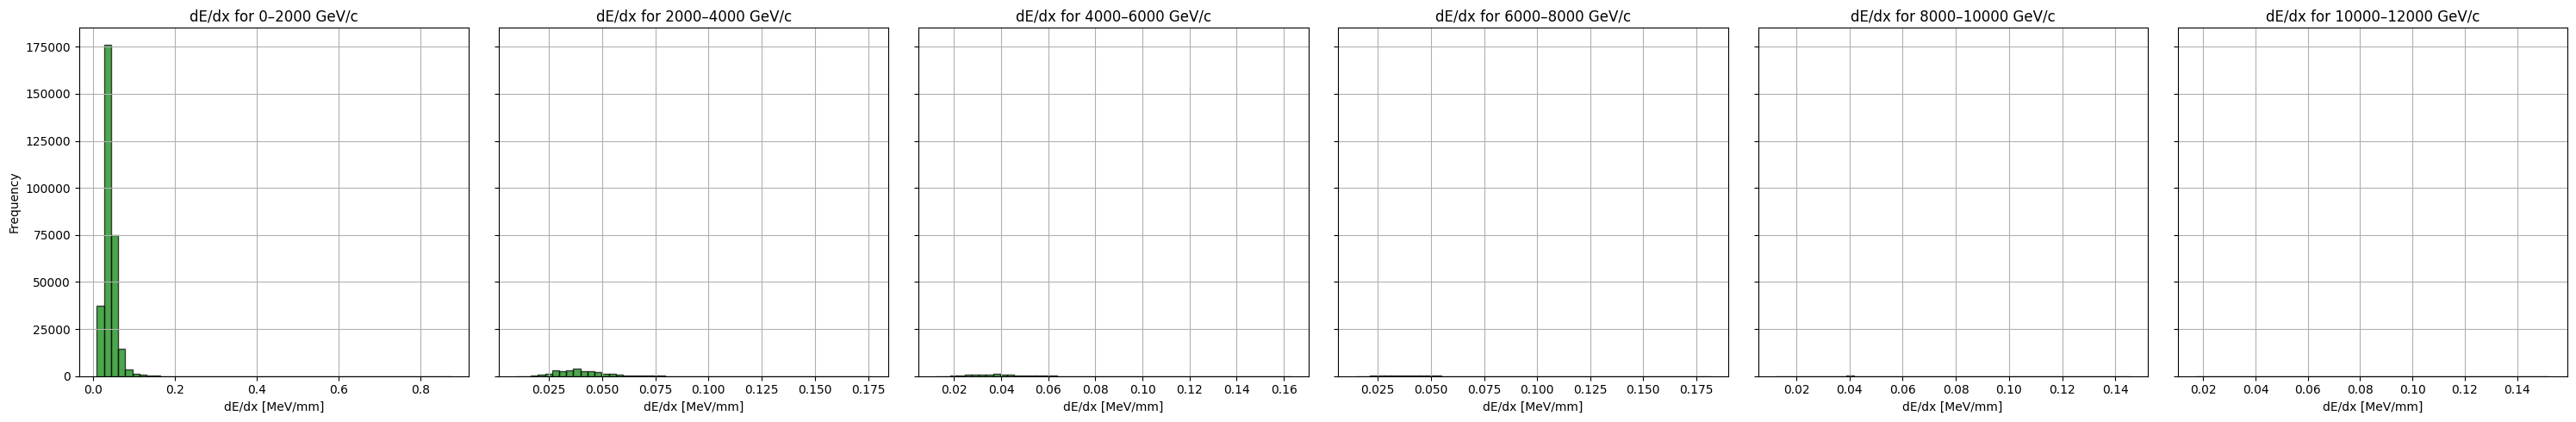

In [ ]:
# dE/dx HISTOGRAM IN p BINNING

fig, axs = plt.subplots(1, len(dedx_binned), figsize=(5 * len(dedx_binned), 5), sharey=True)

for i, ax in enumerate(axs):
    ax.hist(dedx_binned[i], bins=50, color='green', edgecolor='black', alpha=0.7)
    ax.set_title(f"dE/dx for {bin_labels[i]}")
    ax.set_xlabel("dE/dx [MeV/mm]")
    if i == 0:
        ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
plt.show()